# Groupby

In [2]:
import pandas as pd
import numpy as np

In [5]:
df = pd.DataFrame({'key1':['a','a','b','b','a'],
                  'key2':['one', 'two', 'one', 'two','one'],
                  'data1': np.random.randn(5),
                  'data2': np.random.randn(5)})
df

data1     data2 key1 key2
0 -0.032777 -0.384726    a  one
1 -0.211728  0.285942    a  two
2 -0.232940  0.475535    b  one
3  0.024840  1.275619    b  two
4 -0.214916  0.353665    a  one

In [8]:
grouped = df['data1'].groupby(df['key1'])
grouped

In [10]:
grouped.groups

{'a': Int64Index([0, 1, 4], dtype='int64'),
 'b': Int64Index([2, 3], dtype='int64')}

In [16]:
grouped.aggregate(np.mean)

key1
a   -0.153141
b   -0.104050
Name: data1, dtype: float64

In [19]:
df[['key1','key2']]

key1 key2
0    a  one
1    a  two
2    b  one
3    b  two
4    a  one

In [30]:
g2 = df.groupby([df['key1'],df['key2']])
g2.groups

{('a', 'one'): Int64Index([0, 4], dtype='int64'),
 ('a', 'two'): Int64Index([1], dtype='int64'),
 ('b', 'one'): Int64Index([2], dtype='int64'),
 ('b', 'two'): Int64Index([3], dtype='int64')}

In [31]:
g2.aggregate(min)

data1     data2
key1 key2                    
a    one  -0.214916 -0.384726
     two  -0.211728  0.285942
b    one  -0.232940  0.475535
     two   0.024840  1.275619

In [27]:
df

data1     data2 key1 key2
0 -0.032777 -0.384726    a  one
1 -0.211728  0.285942    a  two
2 -0.232940  0.475535    b  one
3  0.024840  1.275619    b  two
4 -0.214916  0.353665    a  one

## Using groupby on the CAISO data set

In [34]:
cds = pd.read_csv('CAISO_2017to2018_stack.csv', index_col = 0)
cds.head()

Source   MWh
2017-08-29 00:00:00   GEOTHERMAL  1181
2017-08-29 00:00:00      BIOMASS   340
2017-08-29 00:00:00       BIOGAS   156
2017-08-29 00:00:00  SMALL HYDRO   324
2017-08-29 00:00:00   WIND TOTAL  1551

In [42]:
cds_time = pd.to_datetime(cds.index)
cds_time[0:5]
cds_time[0].hour

0

In [50]:
cds['hour'] = cds_time.hour
cds.head()

Source   MWh  hour
2017-08-29 00:00:00   GEOTHERMAL  1181     0
2017-08-29 00:00:00      BIOMASS   340     0
2017-08-29 00:00:00       BIOGAS   156     0
2017-08-29 00:00:00  SMALL HYDRO   324     0
2017-08-29 00:00:00   WIND TOTAL  1551     0

In [59]:
cds_grouped = cds['MWh'].groupby([cds['Source'],cds['hour']])

In [52]:
cds_grouped.groups

{(0,
  'BIOGAS'): Index(['2017-08-29 00:00:00', '2017-08-30 00:00:00', '2017-08-31 00:00:00',
        '2017-09-01 00:00:00', '2017-09-02 00:00:00', '2017-09-03 00:00:00',
        '2017-09-04 00:00:00', '2017-09-05 00:00:00', '2017-09-06 00:00:00',
        '2017-09-07 00:00:00',
        ...
        '2018-08-19 00:00:00', '2018-08-20 00:00:00', '2018-08-21 00:00:00',
        '2018-08-22 00:00:00', '2018-08-23 00:00:00', '2018-08-24 00:00:00',
        '2018-08-25 00:00:00', '2018-08-26 00:00:00', '2018-08-27 00:00:00',
        '2018-08-28 00:00:00'],
       dtype='object', length=365),
 (0,
  'BIOMASS'): Index(['2017-08-29 00:00:00', '2017-08-30 00:00:00', '2017-08-31 00:00:00',
        '2017-09-01 00:00:00', '2017-09-02 00:00:00', '2017-09-03 00:00:00',
        '2017-09-04 00:00:00', '2017-09-05 00:00:00', '2017-09-06 00:00:00',
        '2017-09-07 00:00:00',
        ...
        '2018-08-19 00:00:00', '2018-08-20 00:00:00', '2018-08-21 00:00:00',
        '2018-08-22 00:00:00', '2018-08-2

In [72]:
averages = pd.DataFrame(cds_grouped.aggregate(np.mean))
averages
#averages.loc[('BIOGAS',),:]

MWh
Source        hour             
BIOGAS        0      225.591781
              1      225.964384
              2      225.953425
              3      225.887671
              4      225.753425
              5      225.243836
              6      224.479452
              7      222.454795
              8      221.536986
              9      221.539726
              10     221.408219
              11     221.802740
              12     222.731507
              13     223.290411
              14     223.465753
              15     223.717808
              16     224.342466
              17     224.767123
              18     225.473973
              19     226.136986
              20     225.958904
              21     225.797260
              22     225.430137
              23     225.498630
BIOMASS       0      318.301370
              1      318.369863
              2      319.846575
              3      320.567123
              4      321.742466
              5      323.863014
...                         ...
SOLAR THERMAL 18      85.958904
              19      10.364384
              20       1.279452
              21       0.539726
              22       0.136986
              23       0.104110
WIND TOTAL    0     2173.268493
              1     2120.778082
              2     2051.832877
              3     1973.969863
              4     1881.463014
              5     1772.484932
              6     1646.630137
              7     1490.194521
              8     1363.402740
              9     1290.512329
              10    1250.408219
              11    1247.643836
              12    1308.287671
              13    1412.410959
              14    1561.602740
              15    1726.652055
              16    1878.441096
              17    2005.934247
              18    2109.093151
              19    2181.361644
              20    2229.408219
              21    2231.687671
              22    2220.109589
              23    2216.526027

[168 rows x 1 columns]

In [63]:
import matplotlib.pyplot as plt

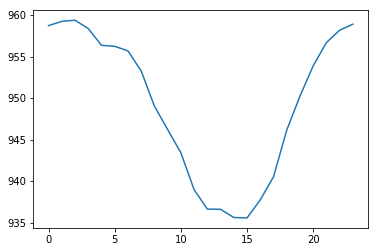

In [65]:
plt.plot(averages.loc[('GEOTHERMAL',),:])

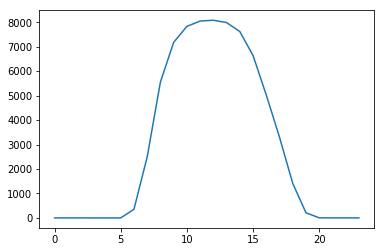

In [67]:
plt.plot(averages.loc[('SOLAR PV',),:])

In [71]:
(averages.loc[:,:])

MWh
Source        hour             
BIOGAS        0      225.591781
              1      225.964384
              2      225.953425
              3      225.887671
              4      225.753425
              5      225.243836
              6      224.479452
              7      222.454795
              8      221.536986
              9      221.539726
              10     221.408219
              11     221.802740
              12     222.731507
              13     223.290411
              14     223.465753
              15     223.717808
              16     224.342466
              17     224.767123
              18     225.473973
              19     226.136986
              20     225.958904
              21     225.797260
              22     225.430137
              23     225.498630
BIOMASS       0      318.301370
              1      318.369863
              2      319.846575
              3      320.567123
              4      321.742466
              5      323.863014
...                         ...
SOLAR THERMAL 18      85.958904
              19      10.364384
              20       1.279452
              21       0.539726
              22       0.136986
              23       0.104110
WIND TOTAL    0     2173.268493
              1     2120.778082
              2     2051.832877
              3     1973.969863
              4     1881.463014
              5     1772.484932
              6     1646.630137
              7     1490.194521
              8     1363.402740
              9     1290.512329
              10    1250.408219
              11    1247.643836
              12    1308.287671
              13    1412.410959
              14    1561.602740
              15    1726.652055
              16    1878.441096
              17    2005.934247
              18    2109.093151
              19    2181.361644
              20    2229.408219
              21    2231.687671
              22    2220.109589
              23    2216.526027

[168 rows x 1 columns]